In [5]:
import numpy as np
from src.tensor import Tensor
from src.module import Module
from src.functional import Linear, ReLU, Softmax, MSELoss
from src.optim import SGD
from sklearn.datasets import load_digits

class MLP(Module):
    def __init__(self):
        self.fc1 = Linear(64, 32)
        self.fc2 = Linear(32,32)
        self.fc3 = Linear(32,10)
        self.relu = ReLU()
        
        self.softmax = Softmax()

    def forward(self, x):
        out = x
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.softmax(out)
        return out

model = MLP()
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=1e-1)

In [6]:
dataset = load_digits()

batch_size = 16
n = dataset['data'].shape[0]
n_batches = np.ceil(n / batch_size)

images = np.expand_dims(dataset['data'], -1) / 16
labels = np.zeros((dataset['target'].shape[0], 10, 1))
for case, label in enumerate(dataset['target']):
    labels[case, label] = 1

In [ ]:
epochs = 100

losses = []
for epoch in range(epochs):
    for ix in range(int(n_batches)):
        print('{}/{}'.format(ix, n_batches), end='\r')
        x = images[ix*batch_size:(ix+1)*batch_size]
        y = Tensor(labels[ix*batch_size:(ix+1)*batch_size])

        y_hat = model(x)

        loss = criterion(y, y_hat)
        losses.append(loss.value)

        loss.backwards()

        optimizer.step()

        model.zero_grad()

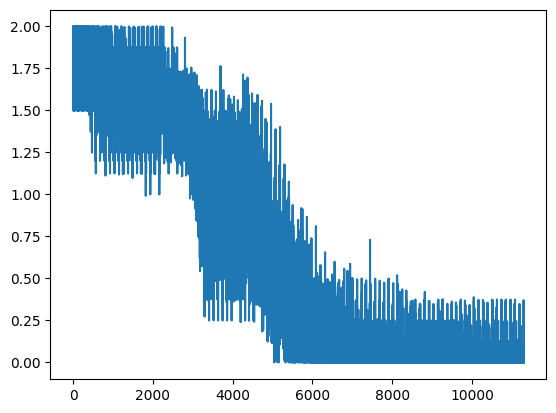

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(int(n_batches * epochs)), losses)
plt.show()